In [25]:
import math
import random
import pandas as pd

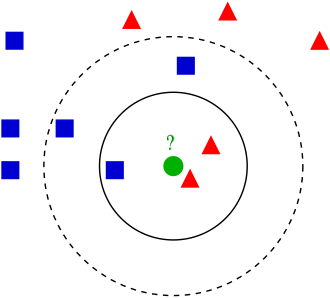

   ### Dataset


In [26]:
dataset = pd.read_csv("gene_expression.csv")
dataset.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [27]:
# Get unique classes
classes = list(set(dataset['Cancer Present'])) 
print('classes:',classes)

number_of_class = len(classes)

# Encode the 'Name' into numeric 
#dataset = dataset.replace('Iris-setosa',0)
#dataset = dataset.replace('Iris-versicolor',1)
#dataset = dataset.replace('Iris-virginica',2)

print('\nnumber_of_records:',len(dataset))
classes # contient dexu valeurs 0 ou 1 

classes: [0, 1]

number_of_records: 3000


[0, 1]

### Dataset d'entrainement et de test


In [28]:
# Getting random indexes
indexes = random.sample(range(0, 3000), 3000)

training_dataset = []
testing_dataset = []

# Splting into training and testing
for i in range(100):
    training_dataset.append(dataset.iloc[indexes[i]])
    
for i in range(100,150):
    testing_dataset.append(dataset.iloc[indexes[i]])

### La fonction de la distance euclidiènne KNN
 Cette fonction implémente l'algorithme KNN pour classifier un exemple de test en se basant sur les k exemples les plus proches dans l'ensemble de données d'entraînement.

In [37]:
def knn(training_dataset, test, k):
    
    # Euclidean Distance
    
    # ED = list(np.sqrt(np.sum(np.square(training_dataset[:,0:-1] - test[0:-1]), axis = 1)))
    ED = []
    for i in range(len(training_dataset)):
        
        add = 0.0
        for j in range(2):
            add +=((training_dataset[i][j]-test[j])**2 )
            
        ED.append(math.sqrt(add))
    
    sorted_ED = sorted(ED)
    
    KNN = []
    for i in range(k):
        index = ED.index(sorted_ED[i])
        KNN.append(training_dataset[index][-1])
    return KNN

### L'appel de la fonction KNN

In [30]:
k = 5

# Creating new Datafra
result = pd.DataFrame(columns=['Gene One','Gene Two',
                               'predicted_class','actual_class','neighbours(K)','Present','NotPresent'])

for i in range(len(testing_dataset)):
    KNN = knn(training_dataset, testing_dataset[i], k)
    
    Present    = 0
    NotPresent = 0
    
    
    for element in KNN:

        if element == 0:
            Present += 1 
        else:
            NotPresent += 1

            
    
    unique_counts = [Present, NotPresent]
    unique_values = ['Present','NotPresent']
    result.loc[i] = [testing_dataset[i][0], testing_dataset[i][1], unique_values[int(unique_counts.index(max(unique_counts)))],
                     unique_values[int(testing_dataset[i][2])],k,Present,NotPresent]
    

In [31]:
result

,Gene One,Gene Two,predicted_class,actual_class,neighbours(K),Present,NotPresent
0,2.8,5.4,Present,Present,5,5,0
1,4.2,7.4,Present,Present,5,5,0
2,7.4,3.4,NotPresent,NotPresent,5,0,5
3,2.8,6.5,Present,Present,5,5,0
4,8.8,1.7,NotPresent,NotPresent,5,0,5
5,2.5,7.3,Present,Present,5,5,0
6,5.6,7.1,Present,Present,5,5,0
7,5.7,3.6,NotPresent,NotPresent,5,1,4
8,8.7,5.1,NotPresent,NotPresent,5,0,5
9,7.1,3.8,NotPresent,Present,5,0,5


## Evaluation du modèle
### Accuracy


In [32]:
accuracy_data = result['actual_class']==result['predicted_class']

true = 0
false = 0
for bool_value in accuracy_data:
    if(bool_value == True):
        true+=1
    else:
        false+=1

In [33]:
accuracy = true/len(accuracy_data)

In [34]:
accuracy

0.92